In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#hacer un display para mostrar todo y luego ya filtras tu
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#disable seaborn warnings
import warnings
warnings.filterwarnings("ignore")


df_base = pd.read_csv(r"..\data\Crime_Data_from_2020_to_Present.csv")

#print(f"La info del dataset {df.describe()}")
#imprime el data hape(filas y columnas)
df_base.shape
df_base.describe(include=np.number)

#para ver una columna en concreto y ver si hay valores atipicos(outliyers)
df_base["Vict Age"].describe()
#ver el tipo de variables del df
df_base.dtypes
#imprime las primeras filas del df
df_base.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [42]:
#Vamos a reescribir el nombre de las columnas a minusculas y con _
columns= df_base.columns
columns=[column.lower() for column in columns]
columns= [column.replace(" ", "_") for column in columns]
df_base.columns = columns

In [ ]:
#ver y eliminar los nulos en las columnas seleccionadas
df_base.isnull().sum()
cols_pre_drop = df_base.shape[0]
df_base = df_base.dropna(subset=["crm_cd_desc", "date_occ", "location", "area_name"])
cols_post_drop =df_base.shape[0]

print(f"Numer de observaciones eliminadas :{cols_pre_drop - cols_post_drop}")

Numer de observaciones eliminadas :0


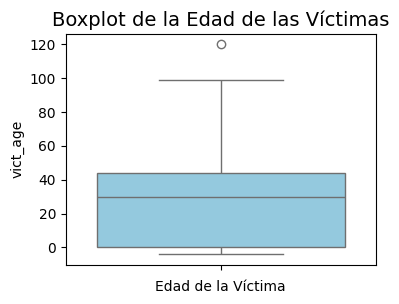

In [31]:
# Ajustar tamaño del gráfico
plt.figure(figsize=(4, 3))

# Crear boxplot
sns.boxplot(df_base["vict_age"], color="skyblue")

# Título y etiquetas
plt.title("Boxplot de la Edad de las Víctimas", fontsize=14)
plt.xlabel("Edad de la Víctima")

plt.show()

In [44]:
df_base.columns
df_base[["vict_age", "premis_cd"]].corr()

,vict_age,premis_cd
vict_age,1.000000,0.186481
premis_cd,0.186481,1.000000


In [ ]:
#Filtrar los datos por zonas

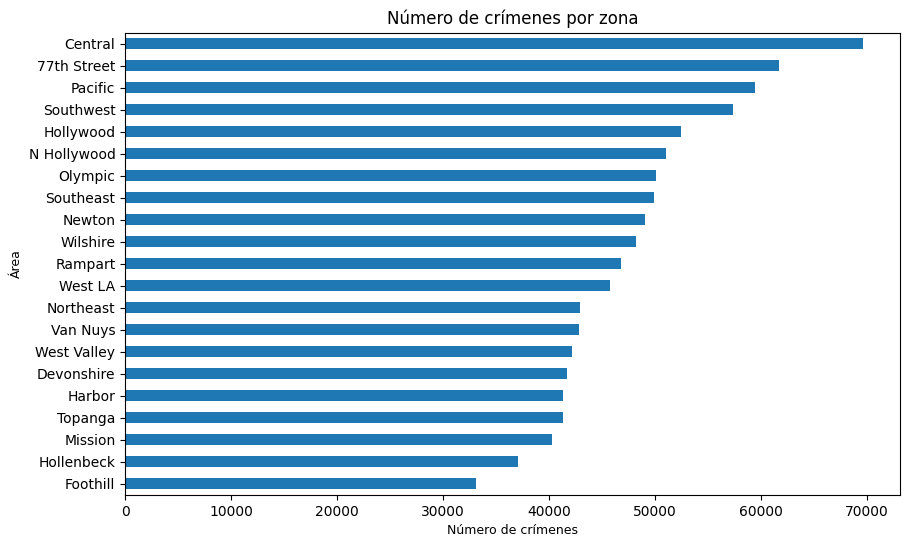

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
crimen=df["premis_desc"]
area=df["area_name"=]
plt.scatter(crime,area)
plt.title(f"Crimenes cometidos en ":{area_name},fontsize=12)
plt.xlabel("Tipo de crime",fontsize=9)
plt.ylabel("NUmero de crimes",fontsize=9)
plt.show()
"""
crime_count_by_area = df_base.groupby("area_name")["premis_desc"].count()
crime_count_by_area = crime_count_by_area.sort_values(ascending=True)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
crime_count_by_area.plot(kind='barh')

# Agregar título y etiquetas
plt.title("Número de crímenes por zona", fontsize=12)
plt.ylabel("Área", fontsize=9)
plt.xlabel("Número de crímenes", fontsize=9)

# Mostrar el gráfico
plt.show()